# ECE-GY 5373 Lab 4 Report (gk1675)

In [1]:
run ../styles.ipynb

Login to hosts  
```shell
# Romeo
ssh gk1675@pc2.lan.sdn.uky.edu -p 29211
# Juliet
ssh gk1675@pc2.lan.sdn.uky.edu -p 29210
# Router
ssh gk1675@pc2.lan.sdn.uky.edu -p 29212
```

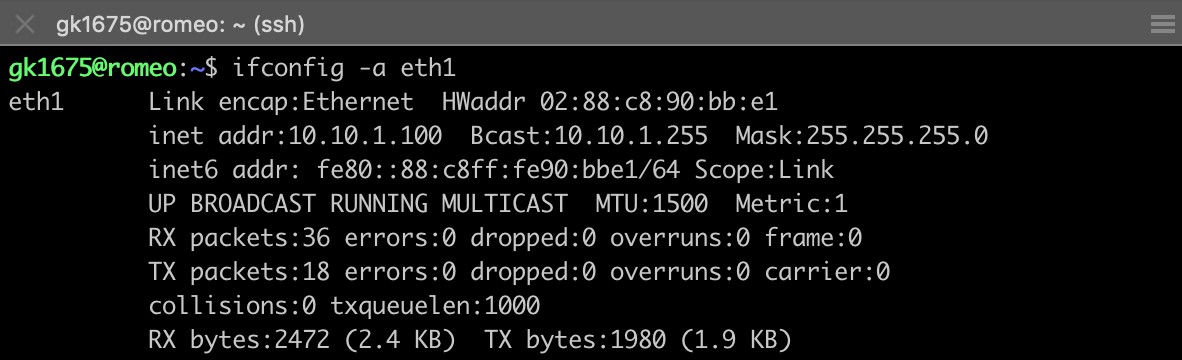

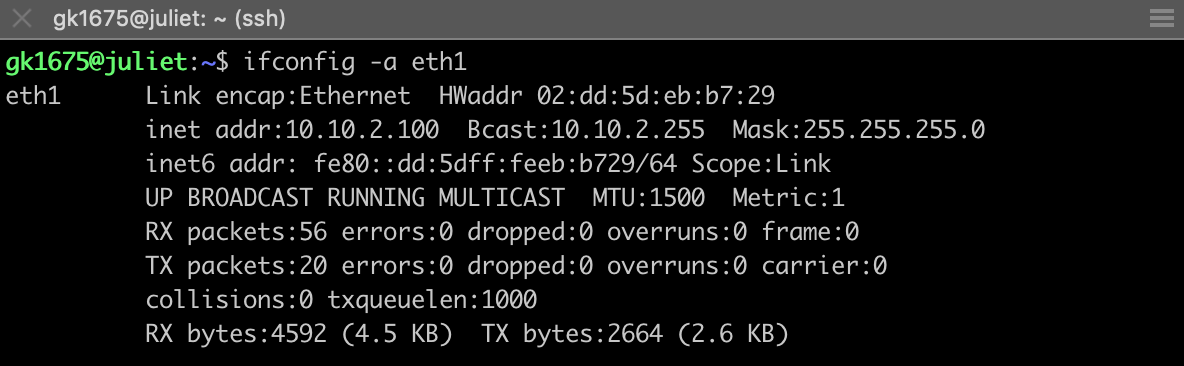

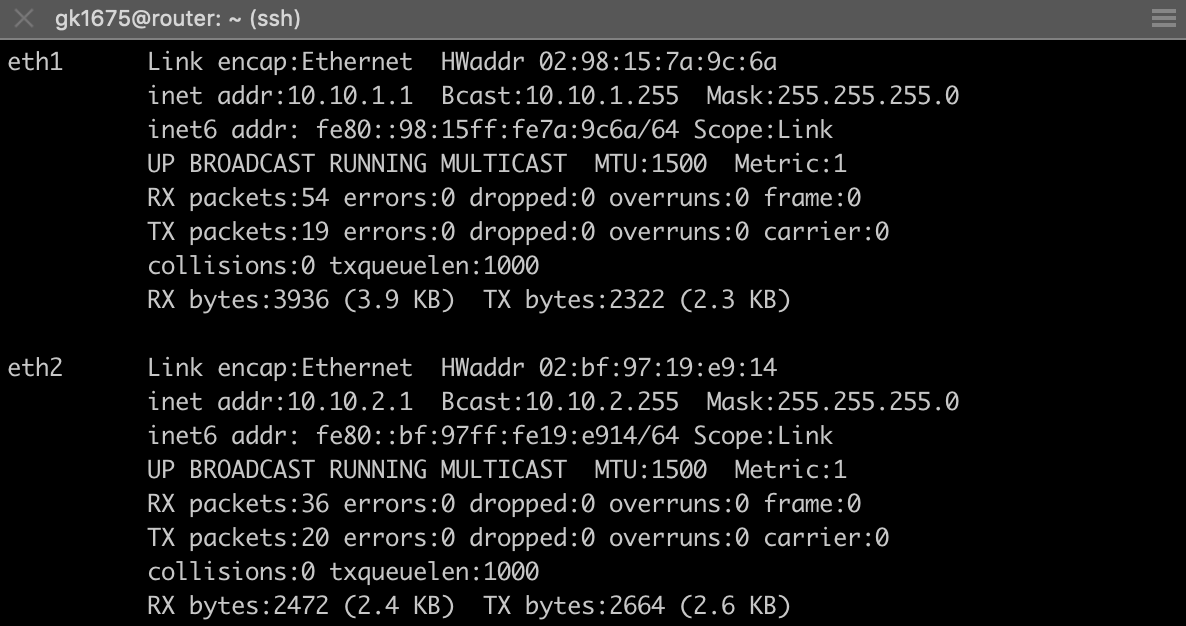

```shell
scp -i ~/.ssh/id_rsa -P 29210 gk1675@pc2.lan.sdn.uky.edu:/users/gk1675/tcp-connection-control-1-juliet.pcap .
```

### Exercise 1

##### Lab report: Explain TCP connection establishment and termination using the tcpdump output.

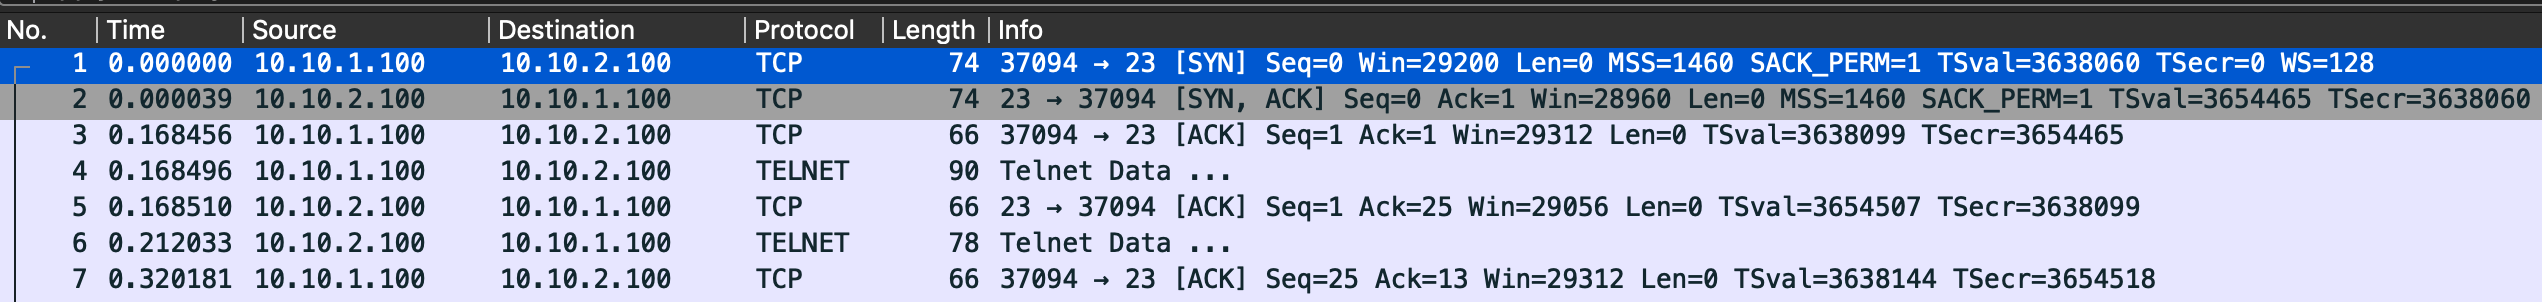

The establish of TCP connection is a 3-way handshake with number 1,2,3 in the above screenshot. [SYN]->[SYN, ACK]->[ACK]   
The termination of TCP connection requires exchange of 4 messages with number 22-25, as in the screenshot below.[FIN]->[ACK]->[FIN,ACK]->[ACK].

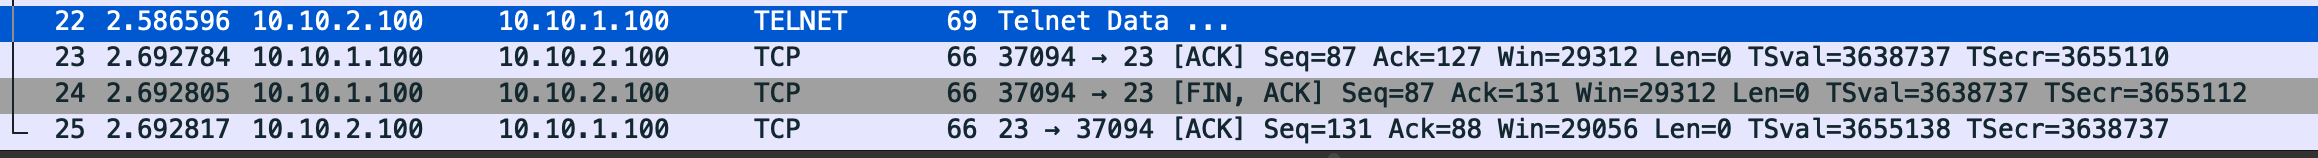

##### Lab report: What were the announced MSS values for the two hosts? What happens if there is an intermediate network that has an MTU less than the MSS of each host, if the DF flag is set? What about if the DF flag is not set? See if the DF flag was set in the tcpdump output.

- The MSS (Maximum segment size) values at both hosts is 1460 Bytes.  
- If there is an intermediate network with MTU value less than this MSS value and DF (Don’t Fragment) flag is set, then the packet is dropped at that intermediate network and an ICMP error message is sent back to the sender host. 
- If DF bit is not set, then the packet is fragmented into smaller size packets (fragments). These fragments are reassembled at destination host only.

```sh
scp -i ~/.ssh/id_rsa -P 29210 gk1675@pc2.lan.sdn.uky.edu:/users/gk1675/*.pcap .
```

### Exercise 2

##### Lab report: Explain what happened in both the UDP and TCP cases. When a client tries to reach a port on which no process is listening, how to UDP and TCP handle this request, respectively?

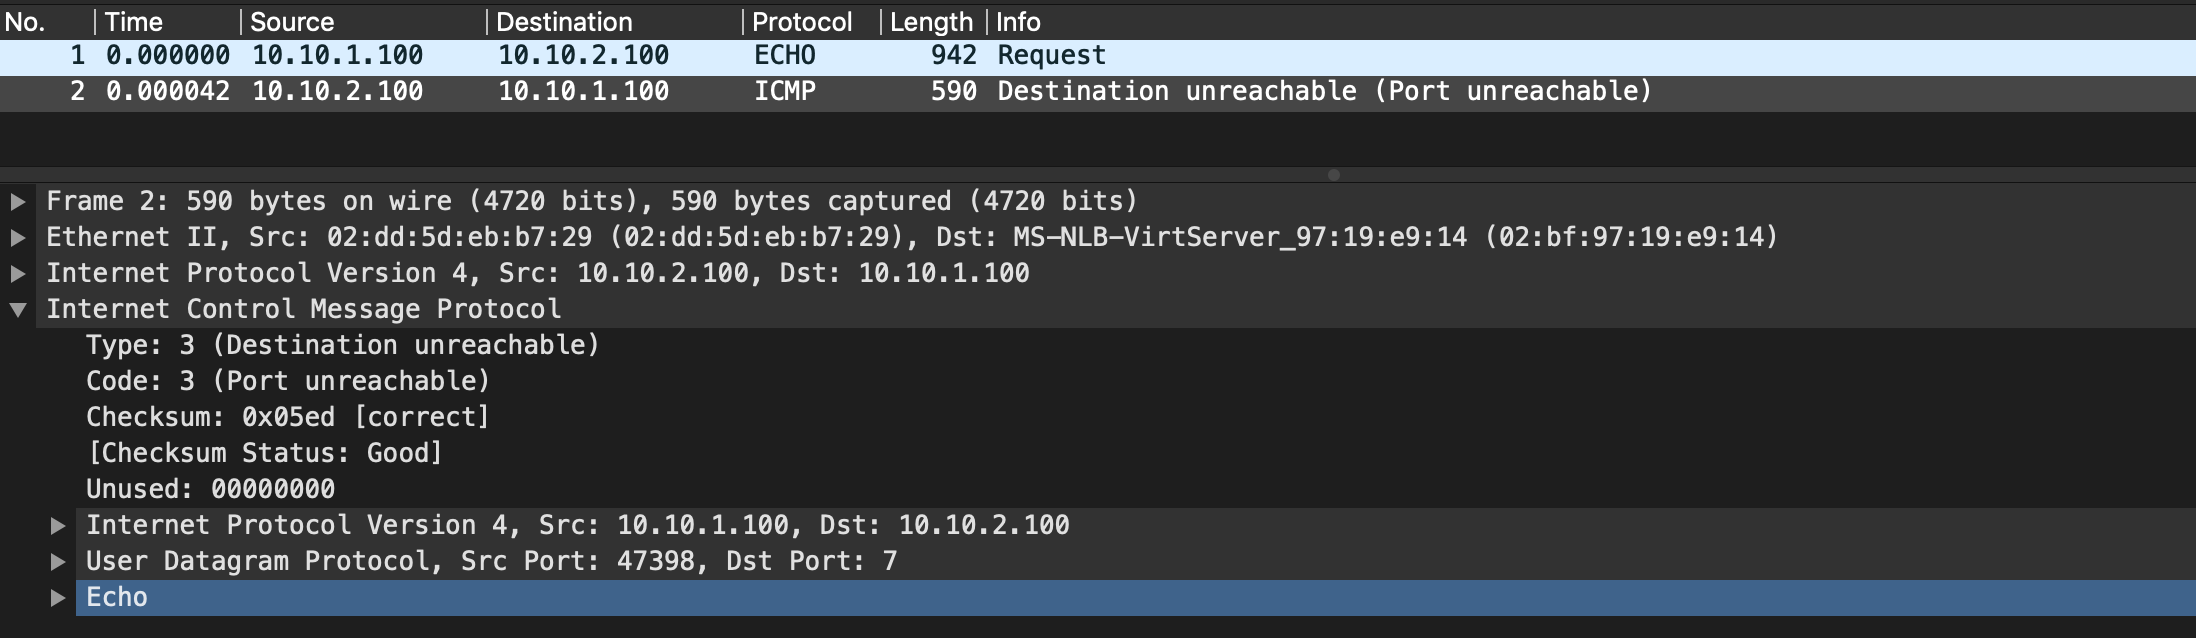

For UDP: We get an ICMP error message Destination Unreachable (Port Unreachable). In response the UDP client send an ARP query to verify server’s MAC address corresponds to its IP address. It get the ARP reply and terminated (may be because it realizes that the it already had the correct MAC address of the server.)

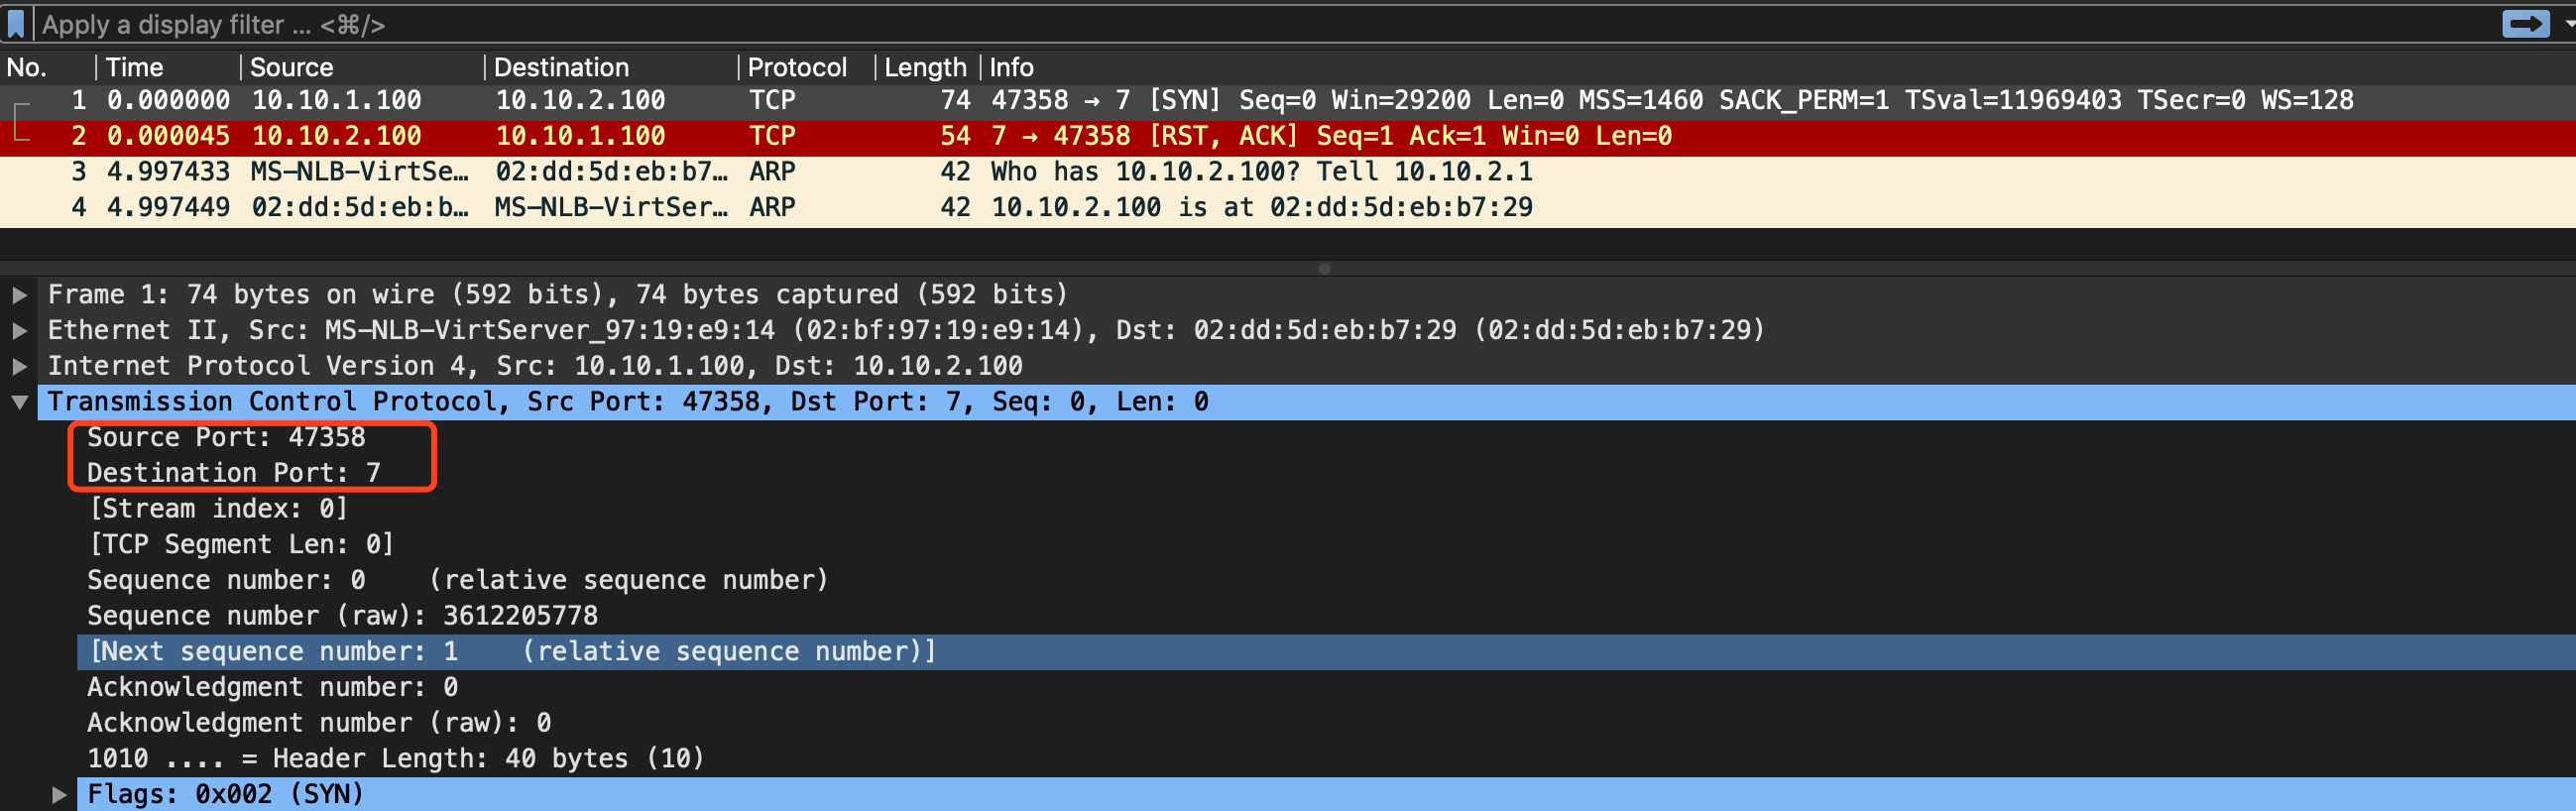

For TCP: When client sends a SYN message for TCP connection, the server responded with a message with [RST (reset), ACK] flag. The RST flags warns the client to immediately kill the connection. The client should not use this connection anymore. The client sent an ARP query and terminated.

### Exercise 3

Lab report: Answer the following questions, based on the tcpdump output saved in the above exercise:

1. What is a delayed acknowledgement? What is it used for?
Can you see any delayed acknowledgements in your tcpdump output? If yes, explain the reason. If you don't see any delayed acknowledgements, explain the reason why none was observed.. Mark some of the lines with delayed acknowledgements, and submit this with your report. Explain how the delayed ACK timer operates, using your tcpdump output.

2. What is the Nagle algorithm used for? From your tcpdump output, can you tell whether the Nagle algorithm is enabled or not? Give the reason for your answer.

3. From your tcpdump output for when you typed very rapidly can you see any segment that contains more than one character going from your workstation to the remote machine?

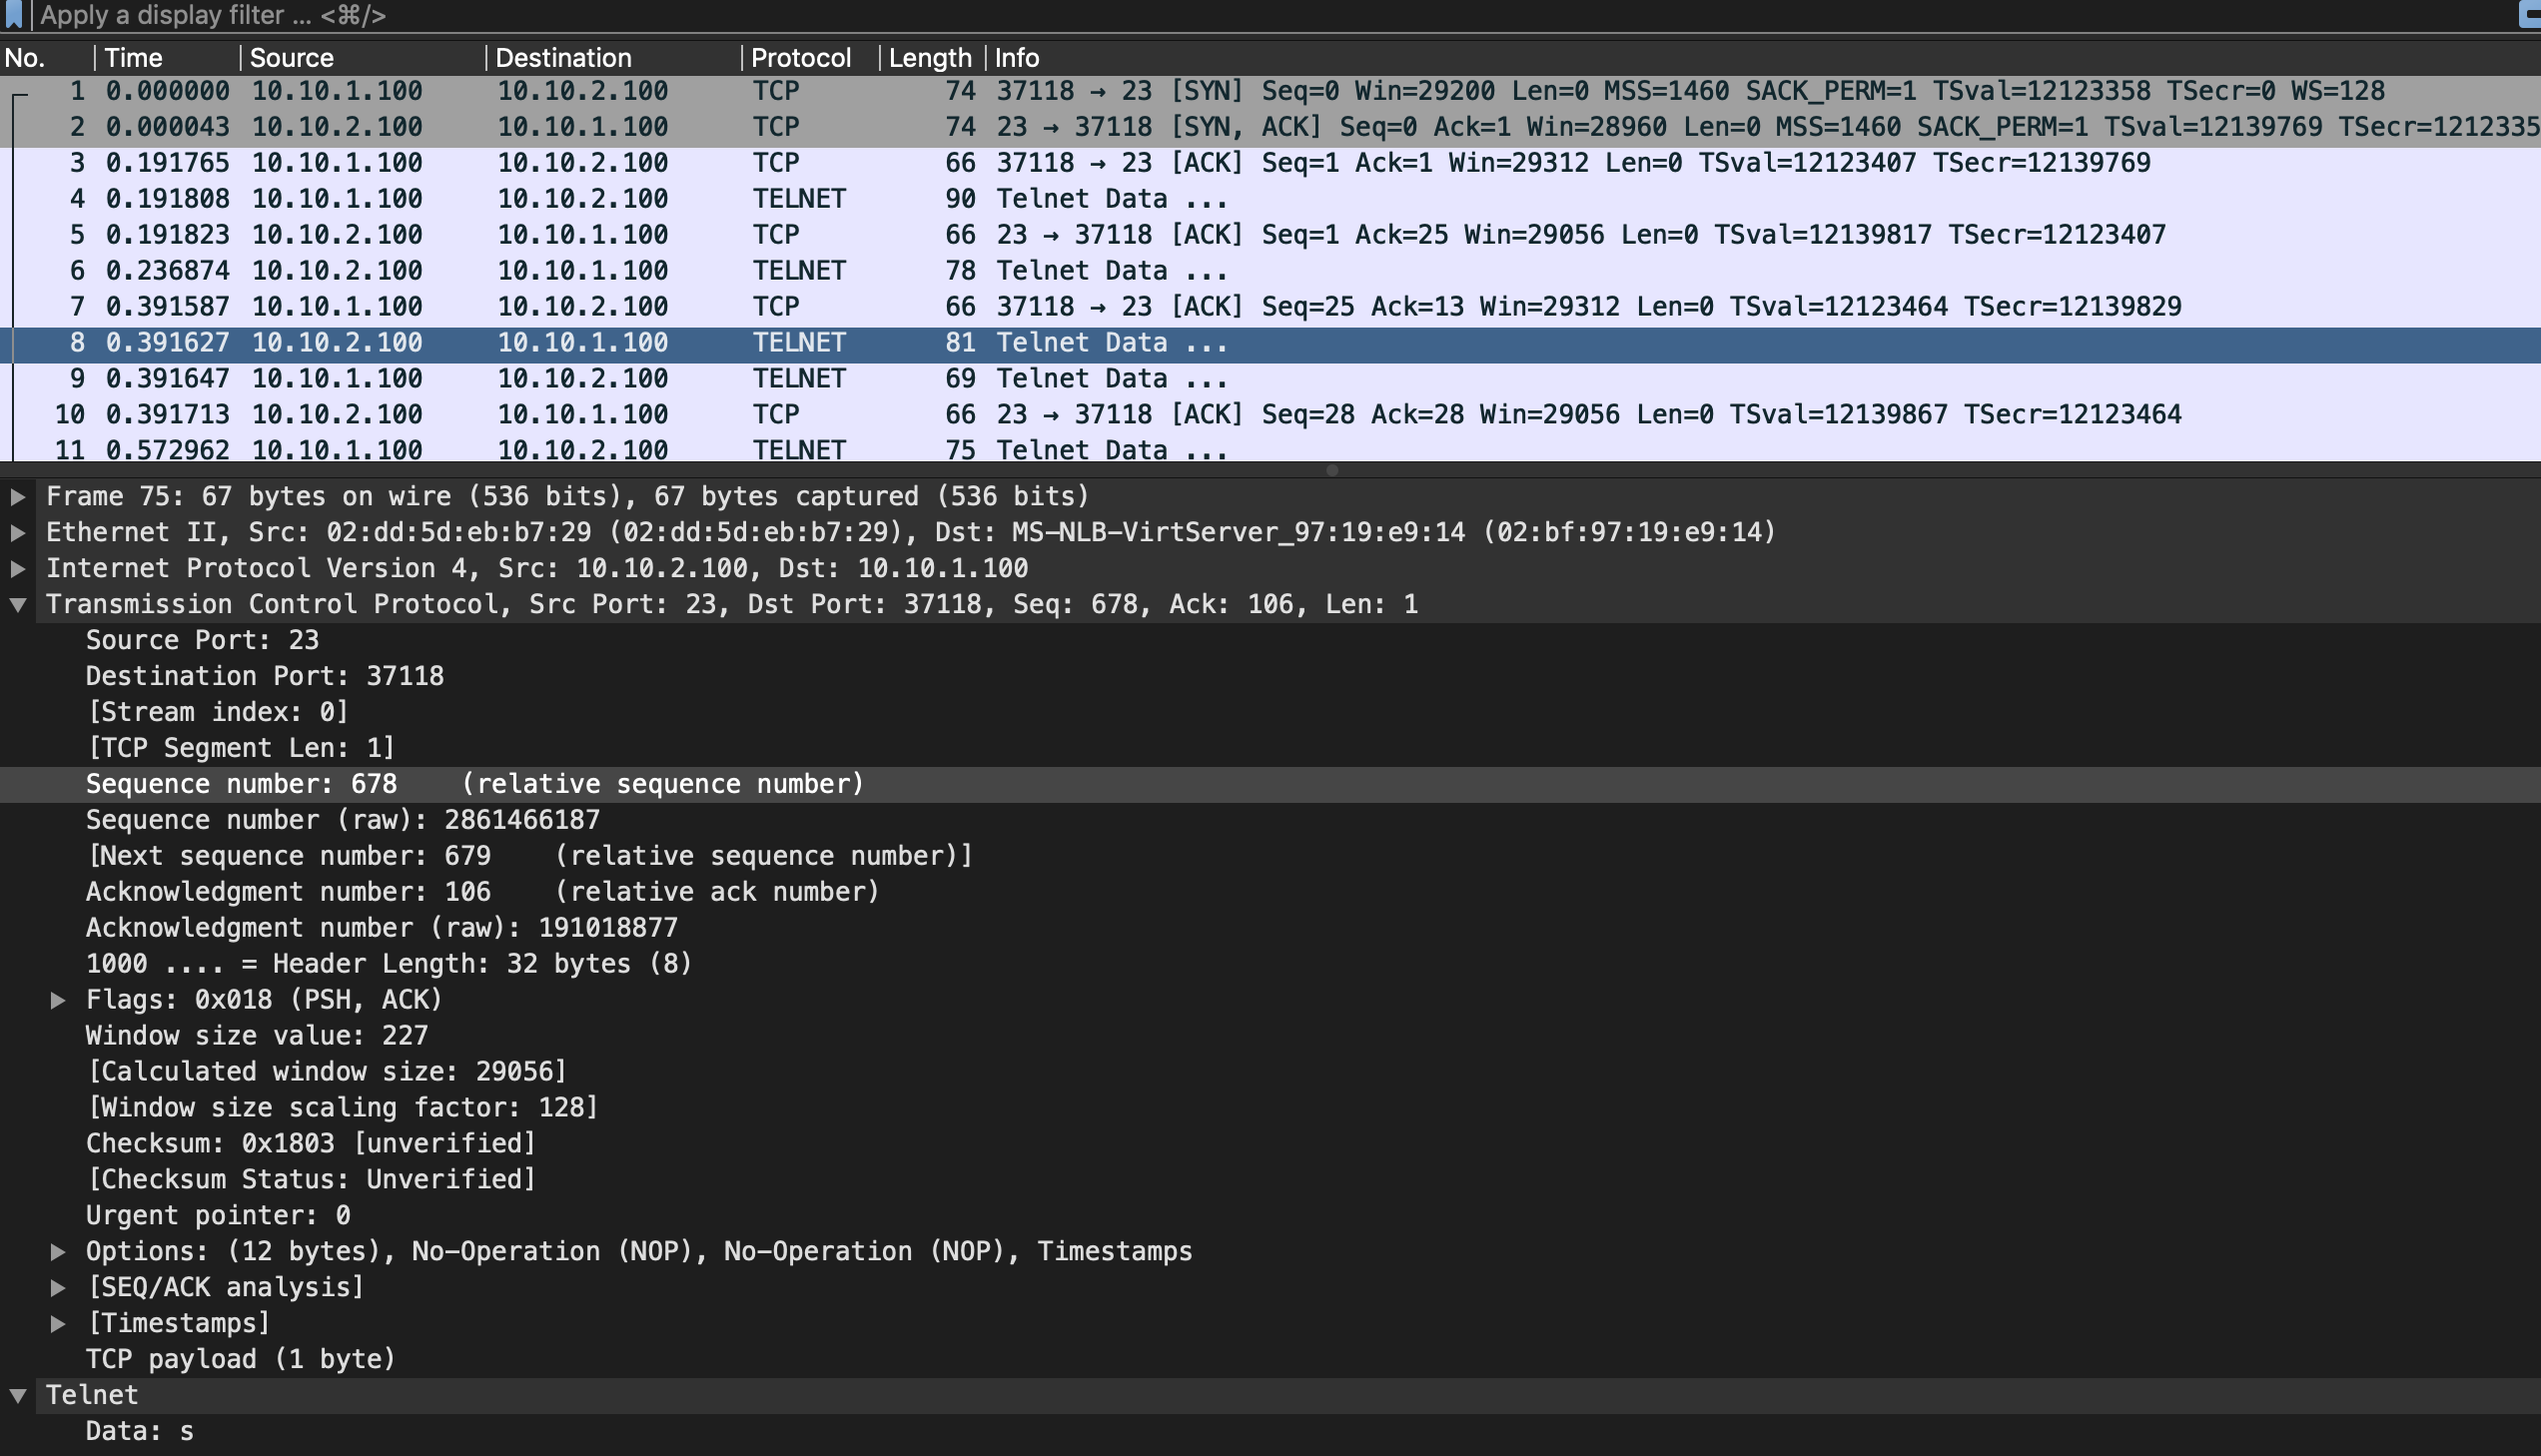

##### Answer:  
1. Delayed Acknowledgement is a technique used with TCP connection for interactive data flow like telnet. With this technique, the receiver instead of sending ack for every received packets (smaller sized), it combines and sends several ACKs in one packet. This is used to improve the network performance. No, we don’t see delayed acknowledgement in tcpdump output. The reason may be that the client is typing slowly into the server through telnet. So, the delay ack timer expires before receiving next packet.
2. Nagle algorithm is another way to improve TCP performance for interactive data flow. In this algorithm, the sender, instead of sending many smaller packets, will delay some packets till it receives a previous ack and then transmit the combined data in one packet. 
3. Yes, Nagle algorithm is enabled. As we can see from the screenshot below, when the sender typed fast (data is ‘ds’) the two character ‘d’ and ‘s’ are combined together and sent as a single packet.

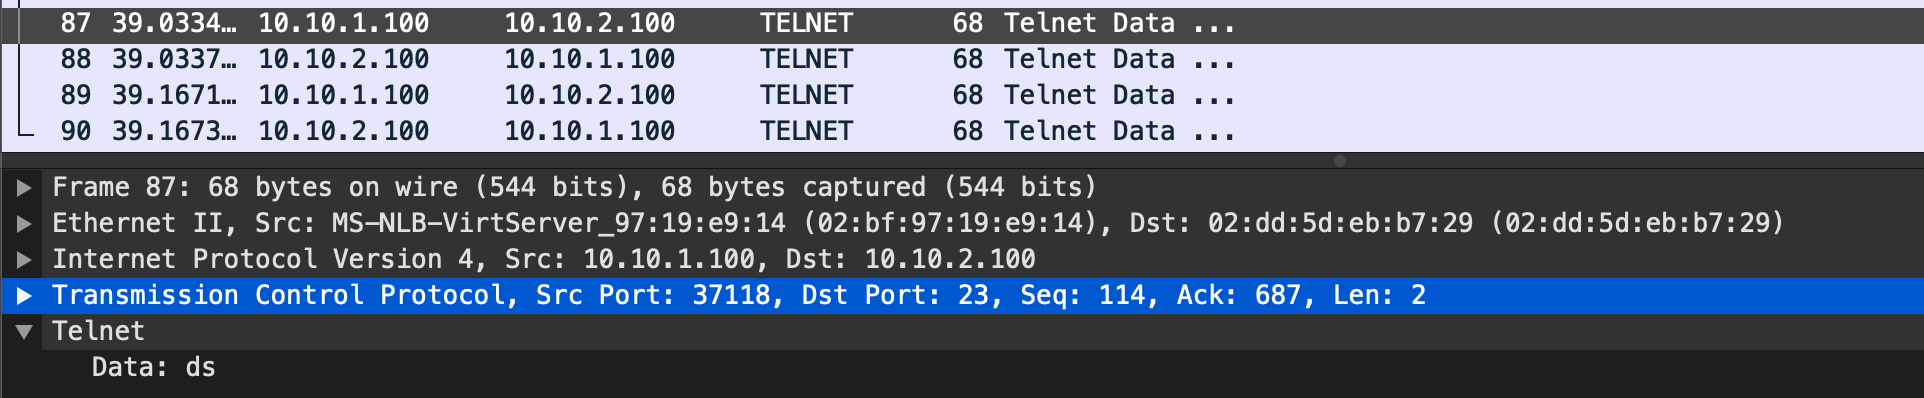

### Exercise 4

##### Lab report: Using one of the three tcpdump outputs, explain the operation of TCP in terms of data segments and their acknowledgements. Does the number of data segments different from that of their acknowledgements? Compare all the tcpdump outputs you saved. Discuss any differences among them, in terms of data segments and their acknowledgements.

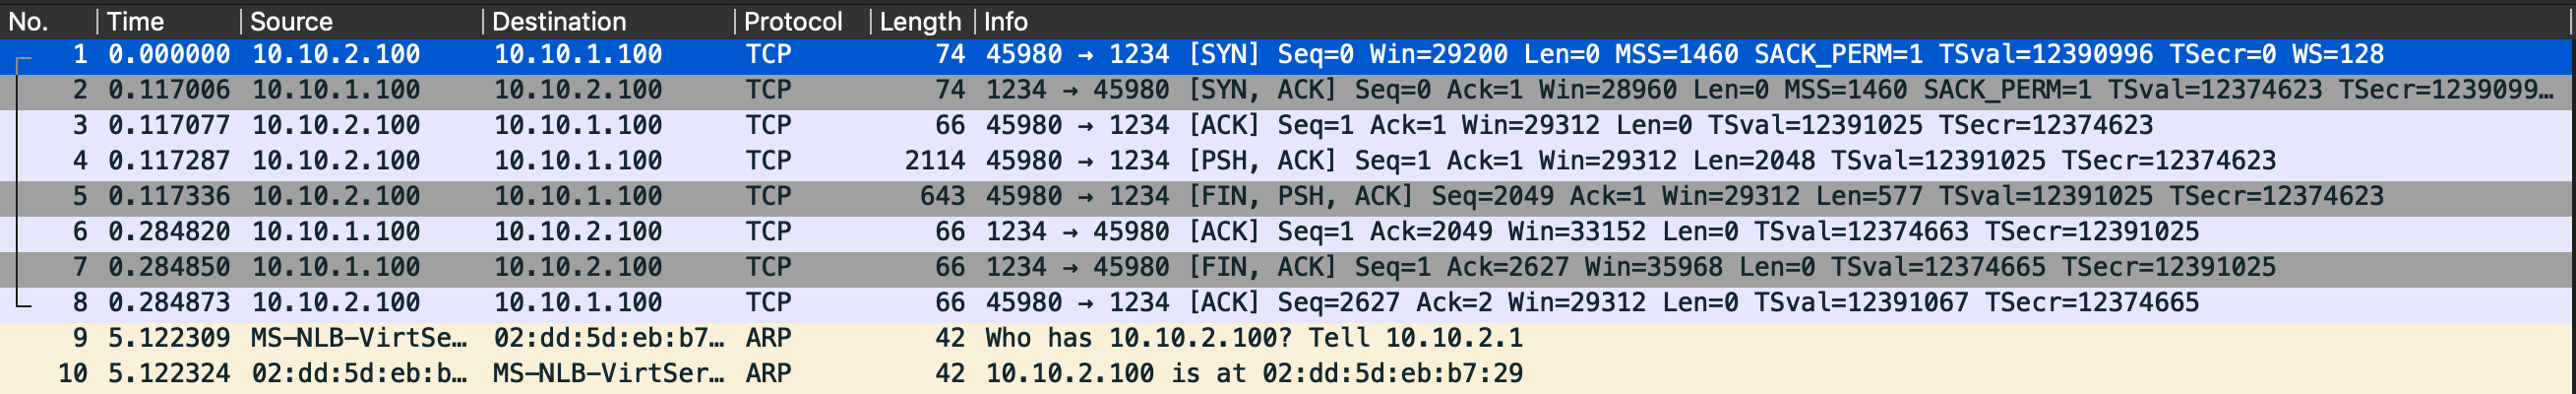

A proper explanation for connection and first few packets is explained in the figure below. TCP starts with slow-start phase where the congestion window (cwnd) increases exponentially i.e., there are two packets transmitted for each ack received. After a certain threshold called ssthresh, TCP cwnd goes in linear phase. In a typical TCP connection, the number of data segments is same as the number of acks received. It is very difficult to analyse this from tcpdump due to large number of retransmission. But, in different attempts, the number of segments varies. This may be due to the different numbers of retransmission for different executions.

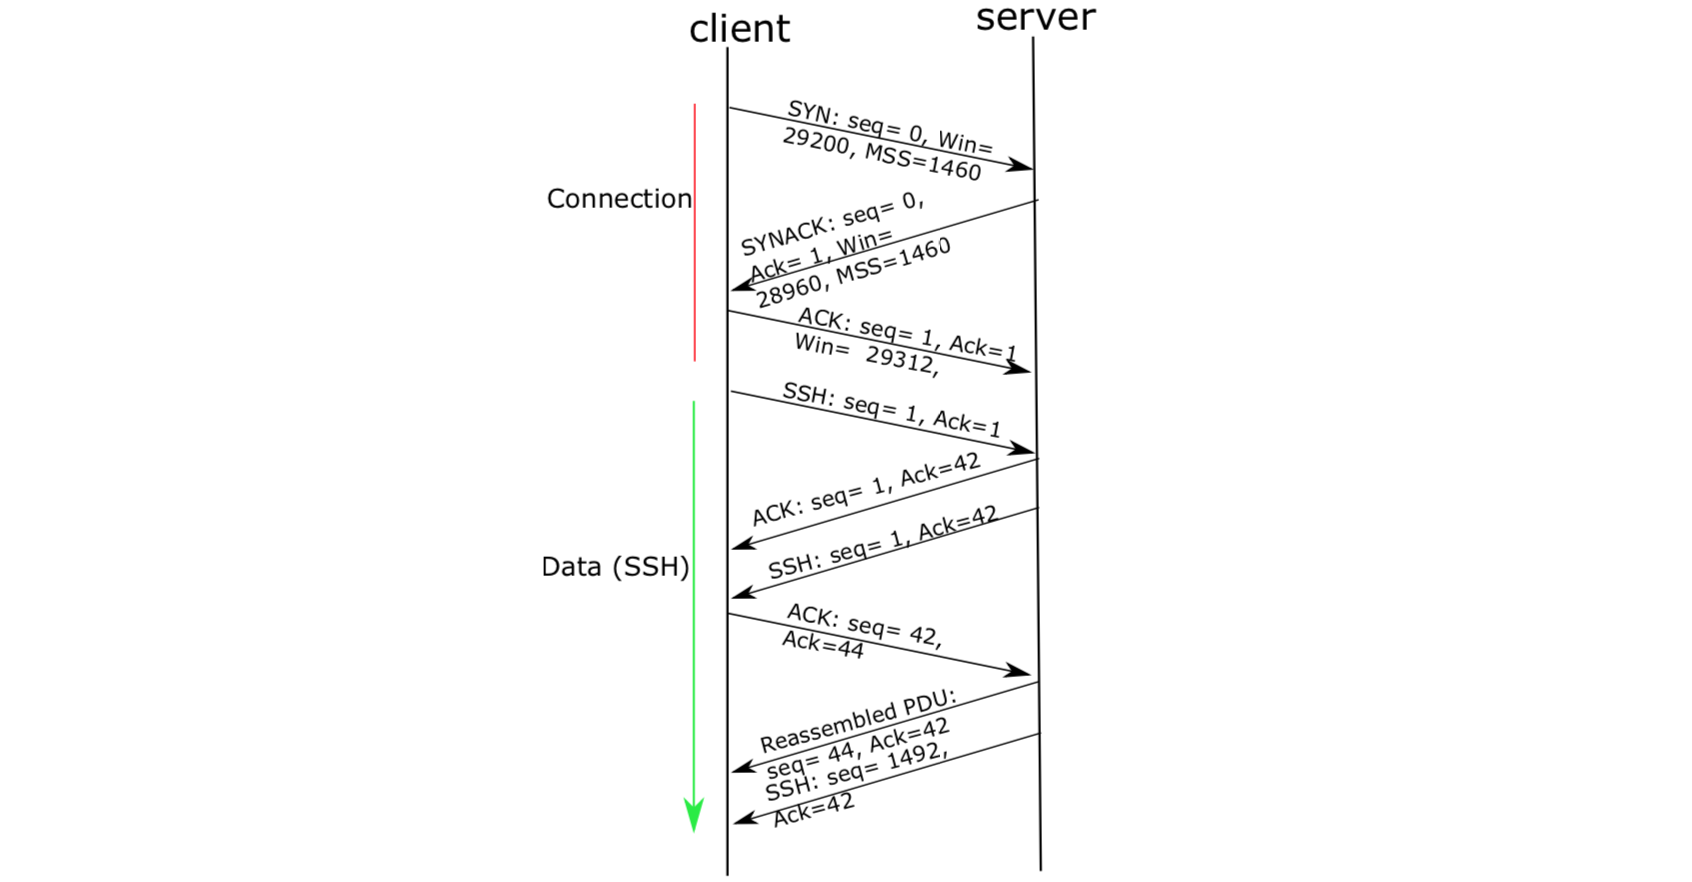

##### Lab report: From the tcpdump output, how many different TCP flags can you see? Enumerate the flags and explain their meanings. How many different TCP options can you see? Explain their meanings.

TCP flags seen in tcpdump output and their meenings:

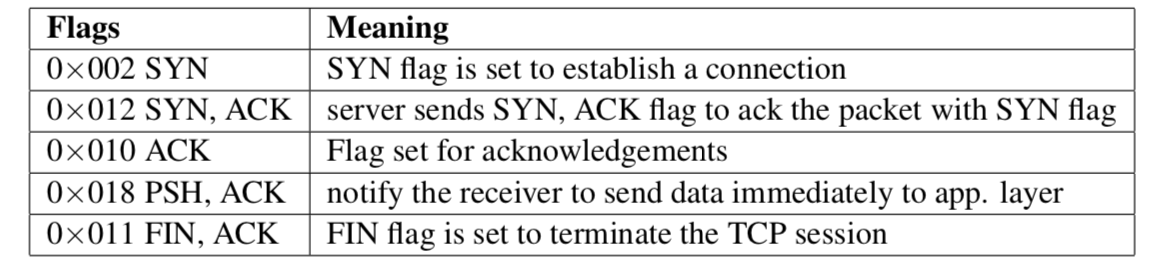

TCP options seen in tcpdump output and explaination:

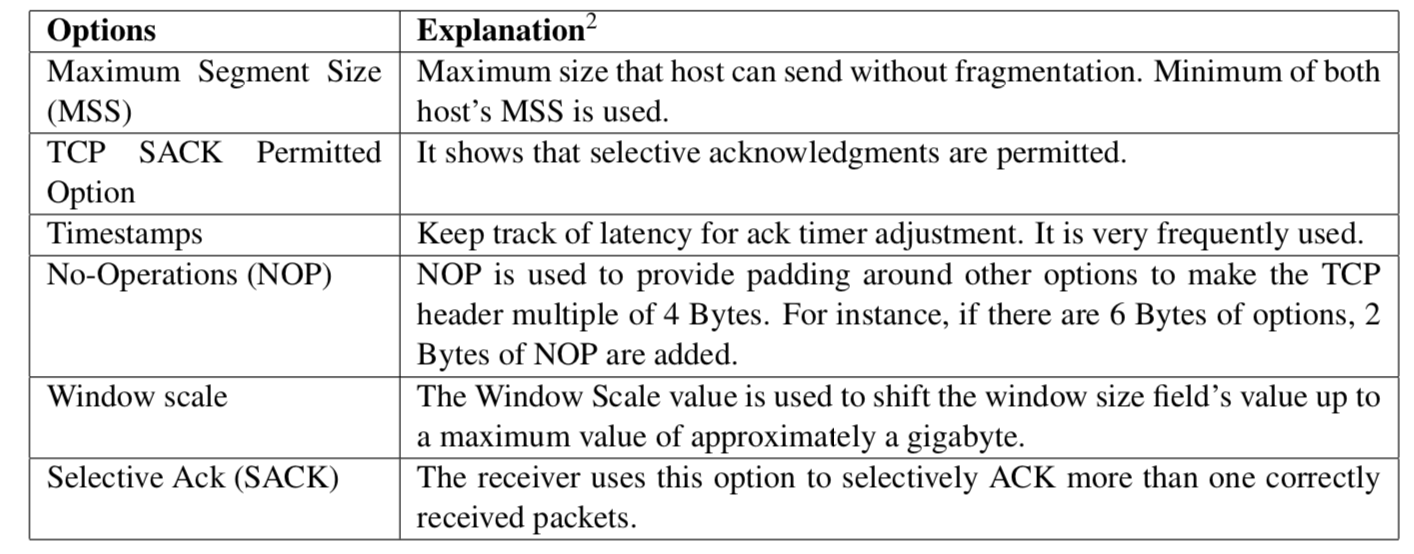

### Exercise 5

##### Lab report: What is the default value of the TCP keepalive timer? What is the maximum number of TCP keepalive probes a host can send?

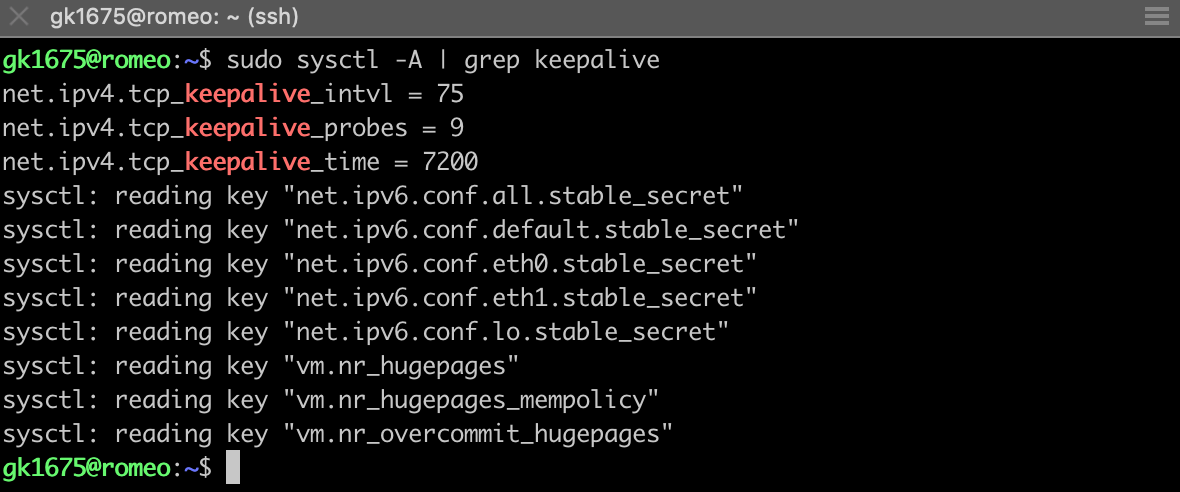

Answer:  
- The default value of the TCP keepalive timer is 7200 s.
- The maximum number of TCP keepalive probes a host can send is 9.

##### Lab report: Explain how TCP keepalive works, using your tcpdump output.

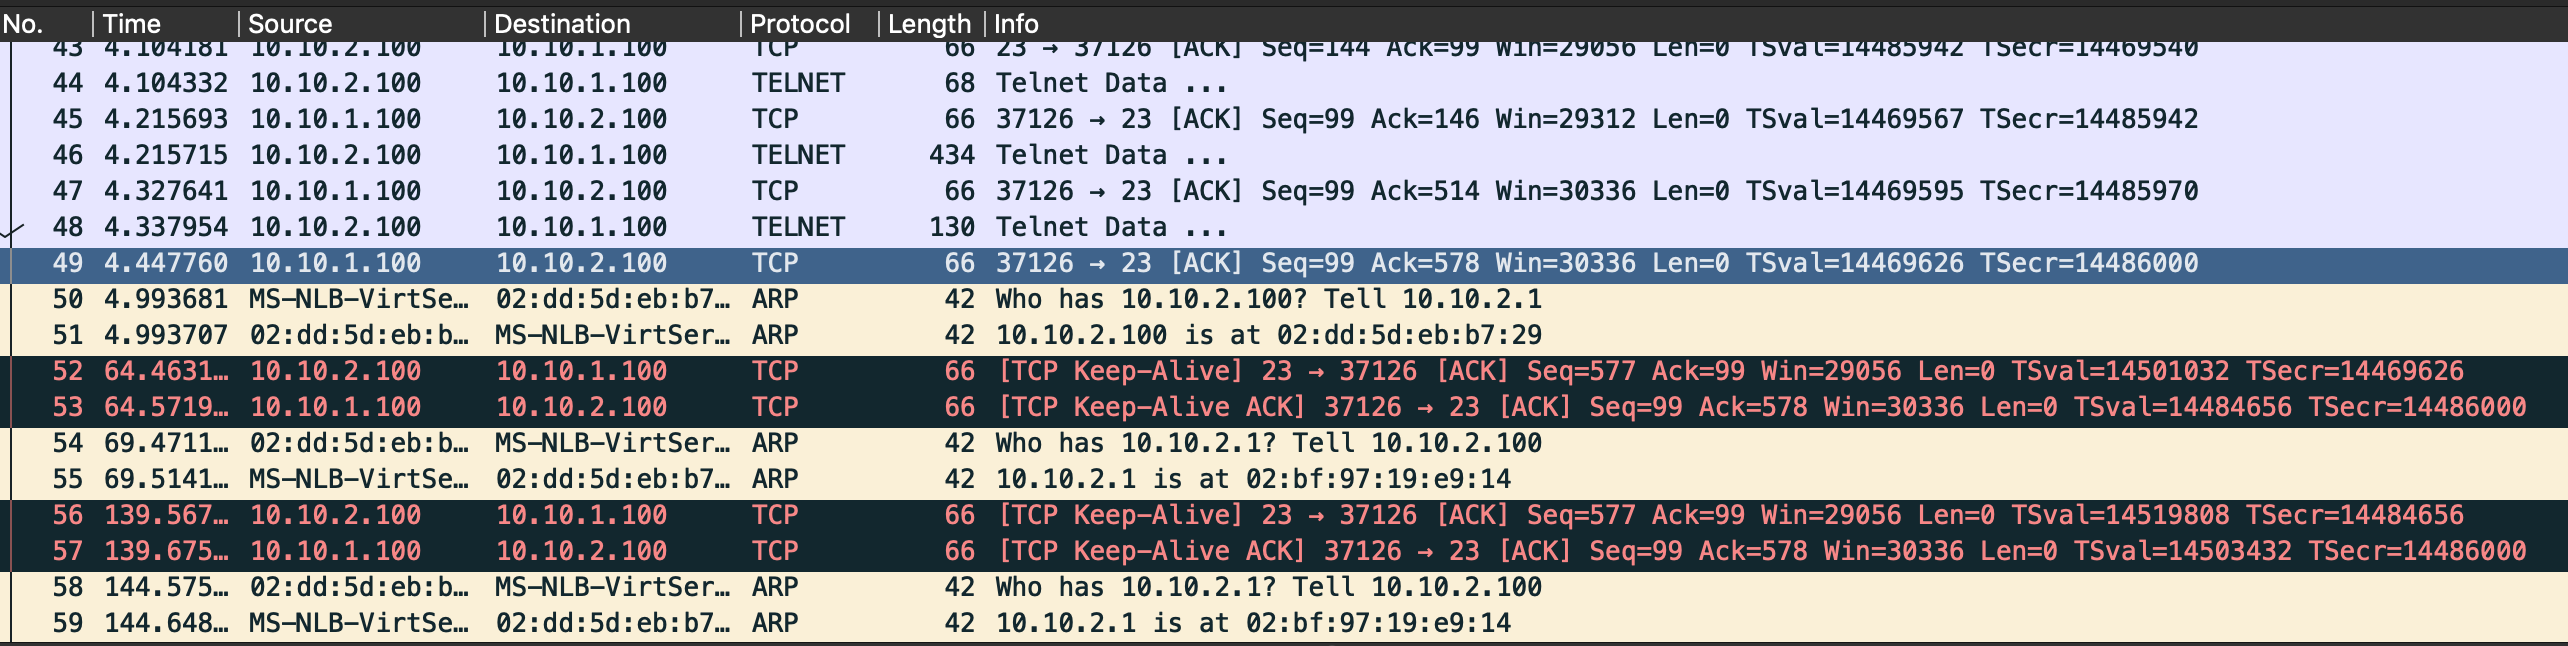

Most hosts that support TCP also support TCP Keepalive. Each host (or peer) periodically sends a TCP packet to its peer which solicits a response. If a certain number of keepalives are sent and no response (ACK) is received then the sending host will terminate the connection from its end. If a connection has been terminated due to a TCP Keepalive time-out and the other host eventually sends a packet for the old connection, the host that terminated the connection will send a packet with the RST flag set to signal the other host that the old connection is no longer active. This will force the other host to terminate its end of the connection so a new connection can be established.

### Exercise 6

##### Lab report: From the tcpdump output, identify when the connection was broken. Describe how the retransmission timer changes after sending each retransmitted packet, during the period when the connection was broken. Explain how the number of data segments that the sender transmits at once (before getting an ACK) changes after the connection is reestablished.

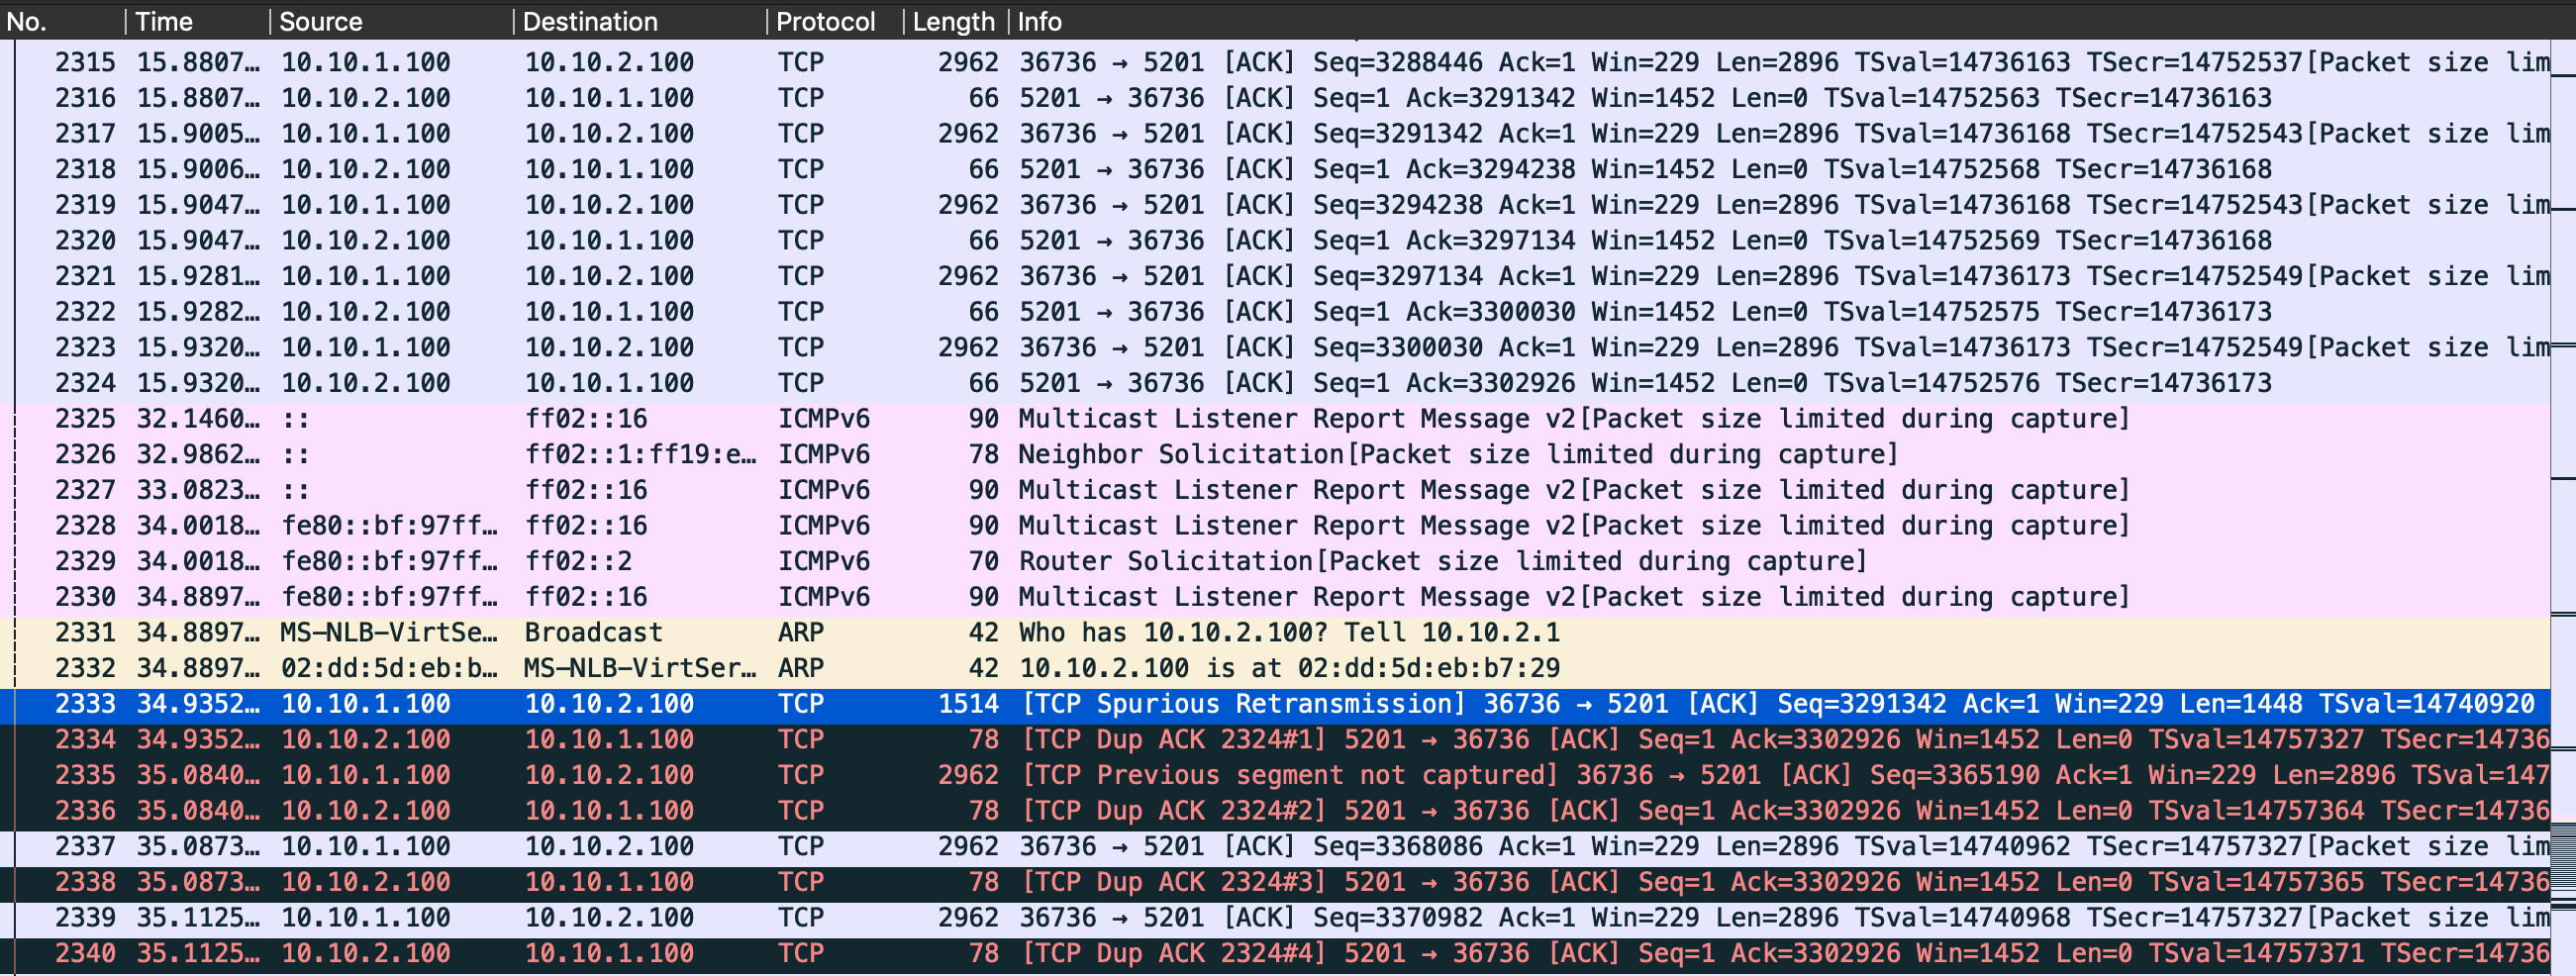

The screenshot of TCPdump analysis is shown in the above figure. The First TCP retransmission is done at 34.9 sec (when cable is disconnected).

Retransmission timer during the period when the cable was disconnected changes. We can see that the TCP retransmission time (RTO value) is roughly doubled after each unsuccessful retransmission. 

The number of unacknowledged packets in the system at any time is the congestion window size (cwnd). From the tcpdump analysis the cwnd before connection loss is 4 MSS (or 4 packets) and it changes to 1 MSS after the connection is reestablished. This can be verified from Figure 12. The last packet’s ack number is 3302926.

### Exercise 7

##### Lab report: Did you observe any IP fragmentation? If IP fragmentation did not occur this time, how do you explain this compared to what you observed in Section 5.6?

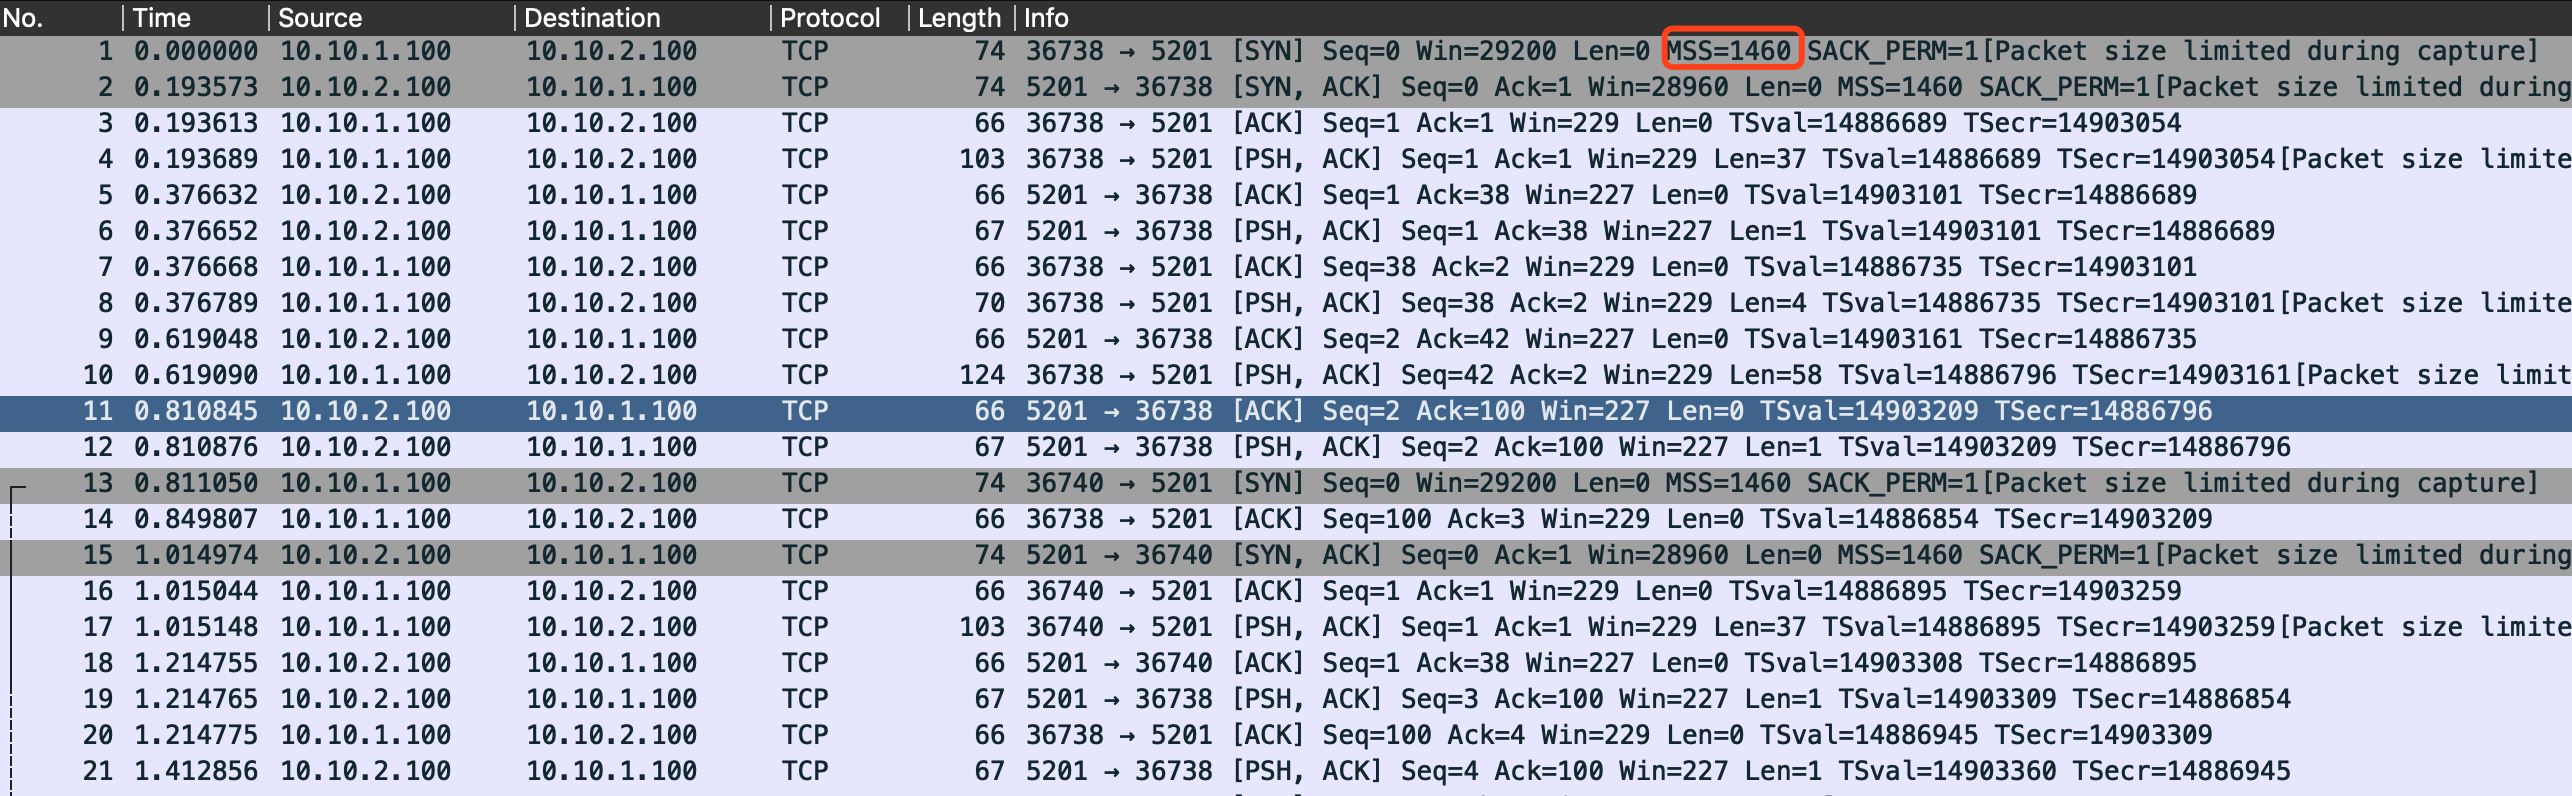

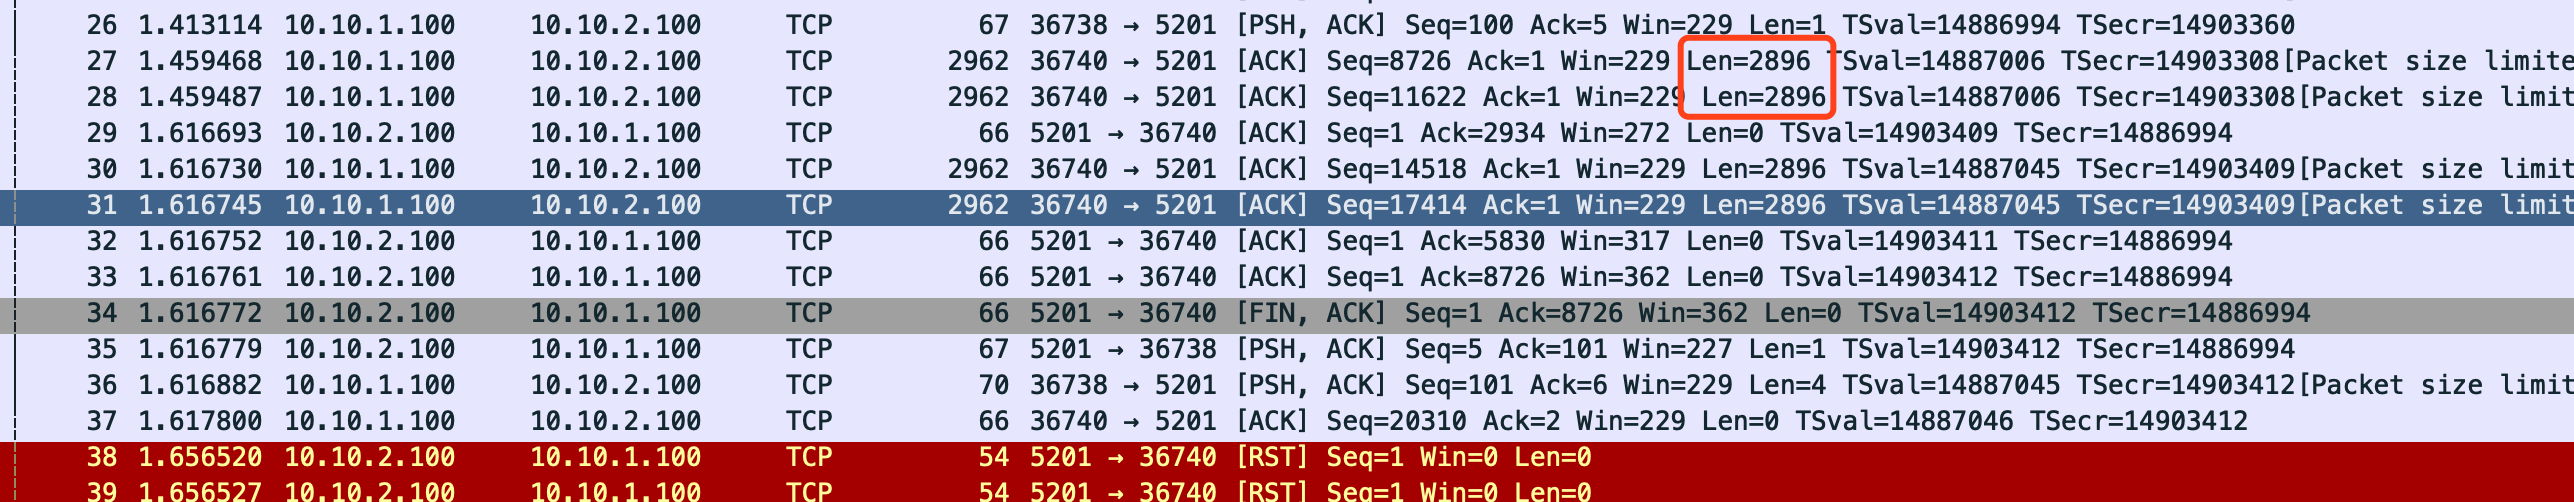

No, we don’t observed any IP fragmentation. We observed IP fragmentation in case of the UDP for size larger than 65507 Bytes. This is because TCP does not send one big packet of large size. It sends packets of maximum 1 MSS size which is 1460 Bytes. So, there is no IP fragmentation for 1460 Bytes packets.

---
P.S. Resources on GENI deleted.   
The source code of this notebook is committed to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_5373_Internet_Architecture_and_Protocols)